In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
M = np.array([0.1, 0.2, 0.15]).reshape(3,1)

In [96]:
M.shape

(3, 1)

In [4]:
#M

In [5]:
C = np.array([[0.005, -0.010, 0.004],
              [-0.010, 0.040, -0.002],
              [0.004, -0.002, 0.023]])

In [97]:
C.shape

(3, 3)

In [7]:
#C

In [8]:
#M.T.shape

In [9]:
mu_v = np.arange(-.1,.4, 0.0001)
mu_v = mu_v.reshape(mu_v.shape[0], 1)

In [10]:
mu_v.shape

(5000, 1)

In [82]:
def port(M, C, mu, flag=None):
    unity = np.ones(M.shape[0]).reshape(M.shape[0],1)
    
    a = np.dot(np.dot(unity.T,np.linalg.inv(C)),unity)[0,0]
    b = np.dot(np.dot(unity.T,np.linalg.inv(C)),M)[0,0]
    c = np.dot(np.dot(M.T,np.linalg.inv(C)),M)[0,0]
    Del = (a*c) - (b**2)
    
    var = (((a*(mu**2)) - (2*b*mu) + c)/Del)
    
    l1 = (c - b*mu)/Del
    l2 = (a*mu - b)/Del

    W = np.dot(np.linalg.inv(C),(unity*l1.T + M*l2.T)).T
    
    if flag=='NS':#signifying no short allowed
        ns = ((W>=0).all(axis=1)) * (W.sum(axis=1) <= 1)
        
        W = W[ns,:]
        var = var[ns,:]
        mu = mu[ns,:]
    
    return(W, var, mu)

In [12]:
#unity = np.ones(M.shape[0]).reshape(M.shape[0],1)

In [13]:
#unity.shape

In [14]:
# a = np.dot(np.dot(unity.T,np.linalg.inv(C)),unity)[0,0]
# b = np.dot(np.dot(unity.T,np.linalg.inv(C)),M)[0,0]
# c = np.dot(np.dot(M.T,np.linalg.inv(C)),M)[0,0]
# Del = (a*c) - (b**2)

# var_v = (((a*(mu_v**2)) - (2*b*mu_v) + c)/Del)

# #sigma_v = np.sqrt(var)

In [15]:
#sigma_v.shape

In [16]:
# l1 = (c - b*mu_v)/Del
# l2 = (a*mu_v - b)/Del

# W = np.dot(np.linalg.inv(C),(unity*l1.T + M*l2.T)).T

In [17]:
#W[range(101,301,20),:].shape

In [18]:
#W[range(101,301,20),:]

In [19]:
#print("W\n",W[range(101,301,20),:])
#print("mu_v\n",mu_v[range(101,301,20),:])
#print("sigma_v\n",sigma_v[range(101,301,20),:])

In [20]:
# zero = np.array([0,0,0]).reshape(1,3)
# zero

In [21]:
#one = np.array([1,1,1]).reshape(1,3)
#one

In [22]:
# ns = np.greater_equal(W, zero)#*np.less_equal(W, one)
# ns = ns[:,0]*ns[:,1]*ns[:,2]
# ns

In [23]:
# W_ns = W[ns,:]
# #W_ns

In [24]:
n01, n12, n02 = np.array([0,1]), np.array([1,2]), np.array([0,2])

In [25]:
M01, M12, M02 = M[n01], M[n12], M[n02]

C01, C12, C02 = C[n01,:][:,n01], C[n12,:][:,n12], C[n02,:][:,n02]

In [26]:
print(M01, M12, M02)
print(C01, C12, C02)

[[0.1]
 [0.2]] [[0.2 ]
 [0.15]] [[0.1 ]
 [0.15]]
[[ 0.005 -0.01 ]
 [-0.01   0.04 ]] [[ 0.04  -0.002]
 [-0.002  0.023]] [[0.005 0.004]
 [0.004 0.023]]


In [27]:
#M01.shape

In [156]:
W_f = np.random.uniform(size=(10000,3))
W_f = W_f/W_f.sum(axis=1).reshape(W_f.shape[0],1)

W_f.shape

(10000, 3)

In [157]:
mu_f = np.dot(W_f,M)

var_f = np.diag(np.dot(np.dot(W_f,C),W_f.T))

In [158]:
print(mu_f.shape, var_f.shape)

(10000, 1) (10000,)


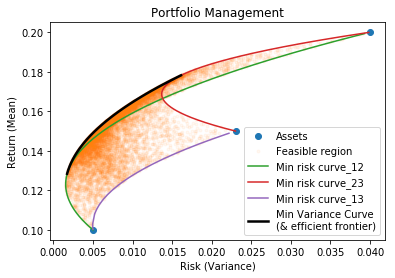

In [201]:
plt.plot(np.diag(C),M, 'o')
#plt.plot(var_v[ns,:], mu_v[ns,:], '.')

plt.plot(var_f, mu_f, '.', alpha=0.05)

P01_NS = port(M01, C01, mu_v, flag='NS')
#plt.plot(P01_NS[1], P01_NS[2], '.')
plt.plot(P01_NS[1], P01_NS[2])
P12_NS = port(M12, C12, mu_v, flag='NS')
#plt.plot(P12_NS[1], P12_NS[2], '.')
plt.plot(P12_NS[1], P12_NS[2])
P02_NS = port(M02, C02, mu_v, flag='NS')
#plt.plot(P02_NS[1], P02_NS[2], '.')
plt.plot(P02_NS[1], P02_NS[2])

P_NS = port(M, C, mu_v, flag='NS')
#plt.plot(P_NS[1], P_NS[2], '.')
plt.plot(P_NS[1], P_NS[2], c='black', lw=2.5)


#plt.plot(np.full((sigma_v.shape), 0.15), mu_v)
#plt.plot(sigma_v, np.full((mu_v.shape), 0.18))
#plt.plot(sigma_m,mu_m, '*')
#plt.plot(0,rf, '*')
#plt.plot(sigma_cml,mu_cml)
plt.title("Portfolio Management")
plt.xlabel("Risk (Variance)")
plt.ylabel("Return (Mean)")

plt.legend(["Assets","Feasible region", "Min risk curve_12", "Min risk curve_23", "Min risk curve_13", "Min Variance Curve\n(& efficient frontier)"])
plt.show()

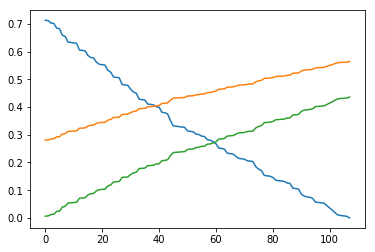

In [176]:
plt.plot(P_NS[0])
plt.show()

Text(0.5,0,'Asset 3')

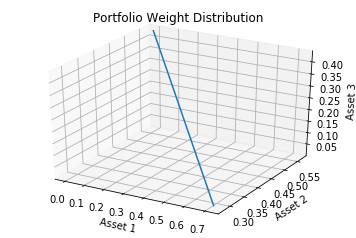

In [228]:
import mpl_toolkits.mplot3d as Axes3D

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(P_NS[0][:,0],P_NS[0][:,1],P_NS[0][:,2])

plt.title("Portfolio Weight Distribution")
ax.set_xlabel('Asset 1')
ax.set_ylabel('Asset 2')
ax.set_zlabel('Asset 3')

In [226]:
point = P_NS[0][np.argmin(np.sum(np.square(P_NS[0]),axis=1)),:]
point

array([0.32638532, 0.43438532, 0.23922936])

In [227]:
direction = (P_NS[0][0,:]-point)
direction = direction/np.sqrt(np.sum(np.square(direction)))
direction

array([ 0.81083009, -0.32225298, -0.4885771 ])

In [225]:
np.sum(np.square(direction))

1.0000000000000002

In [192]:
P_NS[0].shape

(108, 3)

In [190]:
np.sum(np.square(P_NS[0]),axis=1).shape

(108,)

In [180]:
#r = np.random.uniform(size=(20,1))

In [181]:
#r.prod(axis=1)==r[:,0]*r[:,1]

In [182]:
#r.prod(axis=1)

In [183]:
#np.concatenate([r,r,r],axis=0).shape